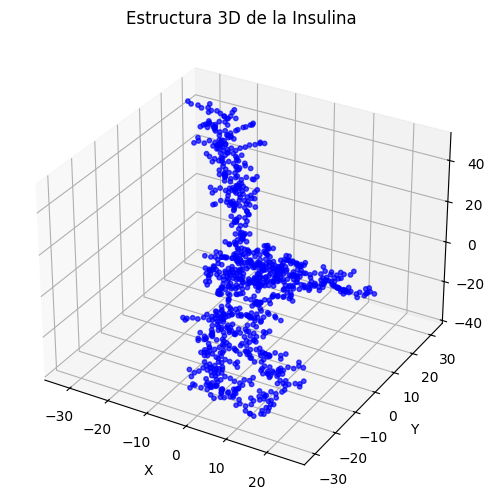

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def graficar(pdb_path):
    """
    Lee un archivo PDB y grafica las posiciones de los átomos en 3D.
    """
    x, y, z = [], [], []
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith('ATOM') or line.startswith('HETATM'):
                try:
                    x.append(float(line[30:38]))
                    y.append(float(line[38:46]))
                    z.append(float(line[46:54]))
                except ValueError:
                    continue
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='blue', s=10, alpha=0.7)
    ax.set_title("Estructura 3D de la Insulina")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Ejemplo de uso:
graficar(r"C:\Tareas002\insulina.pdb")

In [2]:
import py3Dmol

def graficar(pdb_path):
    with open(pdb_path, 'r') as f:
        pdb_data = f.read()
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')
    view.setStyle({'cartoon': {'color': 'spectrum'}})  # Ribbon-like style
    view.addSurface(py3Dmol.VDW, {'opacity': 0.2, 'color':'white'})
    view.zoomTo()
    view.show()

# Ejemplo de uso:
graficar(r"C:\Tareas002\insulina.pdb")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
import numpy as np
import py3Dmol

def desnaturalizar_por_calor(pdb_path, intensidad=8.0):
    """
    Visualiza la insulina nativa y desnaturalizada por calor agregando ruido a las coordenadas.
    """
    # Leer el PDB
    with open(pdb_path, 'r') as f:
        lines = f.readlines()
    
    # Extraer y modificar las coordenadas de ATOM/HETATM
    nuevas_lineas = []
    for line in lines:
        if line.startswith(('ATOM', 'HETATM')):
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            # Agregar 'ruido térmico'
            x2 = x + np.random.normal(0, intensidad)
            y2 = y + np.random.normal(0, intensidad)
            z2 = z + np.random.normal(0, intensidad)
            # Reemplazar las coordenadas en la línea
            nueva_linea = (
                line[:30] +
                f"{x2:8.3f}{y2:8.3f}{z2:8.3f}" +
                line[54:]
            )
            nuevas_lineas.append(nueva_linea)
        else:
            nuevas_lineas.append(line)
    pdb_desnat = ''.join(nuevas_lineas)
    pdb_nativo = ''.join(lines)

    # Visualización lado a lado
    view = py3Dmol.view(width=900, height=400)
    # Nativa (izquierda)
    view.addModel(pdb_nativo, 'pdb')  # model 0
    view.setStyle({'model': 0}, {"cartoon": {'color': 'spectrum'}})
    view.addLabel("Nativa", {'position': {'x': 0, 'y': 0, 'z': 0}, 'backgroundColor': 'white', 'fontSize': 16, 'model': 0})
    # Desnaturalizada (derecha)
    view.addModel(pdb_desnat, 'pdb')  # model 1
    view.setStyle({'model': 1}, {"line": {'color': 'red', 'opacity': 0.8}})
    view.addLabel("Desnaturalizada (calor)", {'position': {'x': 0, 'y': 0, 'z': 0}, 'backgroundColor': 'white', 'fontSize': 16, 'model': 1})
    # Mostrar ambos modelos lado a lado
    view.setViewStyle({'sideBySide': True})
    view.zoomTo()
    view.show()

# Ejemplo de uso:
desnaturalizar_por_calor(r"C:\Tareas002\insulina.pdb", intensidad=8.0)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
import numpy as np
import py3Dmol

def desnaturalizar_pdb(pdb_path, intensidad=8.0):
    """
    Lee un archivo PDB, le agrega 'ruido térmico' a las coordenadas de los átomos,
    y retorna el PDB desnaturalizado como string.
    """
    with open(pdb_path, 'r') as file:
        lines = file.readlines()
    nueva_pdb = []
    for line in lines:
        if line.startswith(("ATOM", "HETATM")):
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            x2 = x + np.random.normal(0, intensidad)
            y2 = y + np.random.normal(0, intensidad)
            z2 = z + np.random.normal(0, intensidad)
            nueva_linea = (
                line[:30] +
                f"{x2:8.3f}{y2:8.3f}{z2:8.3f}" +
                line[54:]
            )
            nueva_pdb.append(nueva_linea)
        else:
            nueva_pdb.append(line)
    return ''.join(nueva_pdb)

def graficar_pdb_string(pdb_string, estilo="cartoon", color="spectrum", titulo="Estructura"):
    """
    Grafica un string PDB usando py3Dmol.
    """
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_string, 'pdb')
    if estilo == "cartoon":
        view.setStyle({'cartoon': {'color': color}})
    else:
        view.setStyle({'line': {'color': color}})
    view.setBackgroundColor('white')
    view.zoomTo()
    view.show()

def mostrar_nativa_y_desnaturalizada(pdb_path):
    # Estructura nativa
    with open(pdb_path, 'r') as f:
        pdb_nativo = f.read()
    pdb_desnaturalizado = desnaturalizar_pdb(pdb_path, intensidad=25)
    
    print("Mostrando estructura nativa...")
    graficar_pdb_string(pdb_nativo, estilo="cartoon", color="spectrum", titulo="Nativa")
    
    print("Mostrando estructura desnaturalizada (por calor)...")
    graficar_pdb_string(pdb_desnaturalizado, estilo="line", color="red", titulo="Desnaturalizada por calor")

# USO:
# Cambia la ruta por la tuya si es necesario
mostrar_nativa_y_desnaturalizada(r"C:\Tareas002\insulina.pdb")

Mostrando estructura nativa...


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Mostrando estructura desnaturalizada (por calor)...


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

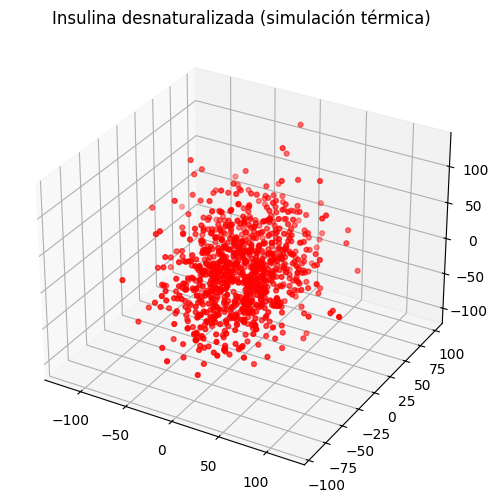

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def desnaturalizar_y_graficar(pdb_path, intensidad=30.0):
    x, y, z = [], [], []
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith(('ATOM', 'HETATM')):
                xi = float(line[30:38]) + np.random.normal(0, intensidad)
                yi = float(line[38:46]) + np.random.normal(0, intensidad)
                zi = float(line[46:54]) + np.random.normal(0, intensidad)
                x.append(xi)
                y.append(yi)
                z.append(zi)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='red', s=12)
    ax.set_title("Insulina desnaturalizada (simulación térmica)")
    plt.show()

desnaturalizar_y_graficar(r"C:\Tareas002\insulina.pdb", intensidad=30.0)

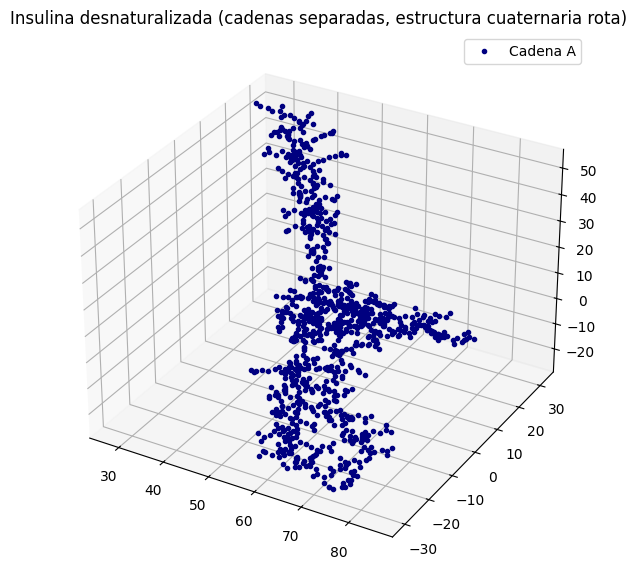

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def desnaturalizar_cuaternaria(pdb_path, separacion=60.0):
    cadenas = {}
    # Leer coordenadas por cadena
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith(('ATOM', 'HETATM')):
                chain = line[21]
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                # Guardar por cadena
                if chain not in cadenas:
                    cadenas[chain] = {'x': [], 'y': [], 'z': []}
                cadenas[chain]['x'].append(x)
                cadenas[chain]['y'].append(y)
                cadenas[chain]['z'].append(z)
    # Asignar vectores de separación para cada cadena
    desplazamientos = np.linspace(0, 2*np.pi, len(cadenas), endpoint=False)
    colores = plt.cm.jet(np.linspace(0,1,len(cadenas)))
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    for i, (chain, coords) in enumerate(cadenas.items()):
        # Calcular desplazamiento radial para cada cadena
        dx = separacion * np.cos(desplazamientos[i])
        dy = separacion * np.sin(desplazamientos[i])
        dz = separacion * (np.random.rand()-0.5)  # Un poco de variación en Z
        x = np.array(coords['x']) + dx
        y = np.array(coords['y']) + dy
        z = np.array(coords['z']) + dz
        ax.plot(x, y, z, '.', label=f'Cadena {chain}', color=colores[i])
    ax.set_title("Insulina desnaturalizada (cadenas separadas, estructura cuaternaria rota)")
    ax.legend()
    plt.show()

# Ejemplo de uso:
desnaturalizar_cuaternaria(r"C:\Tareas002\insulina.pdb", separacion=60.0)

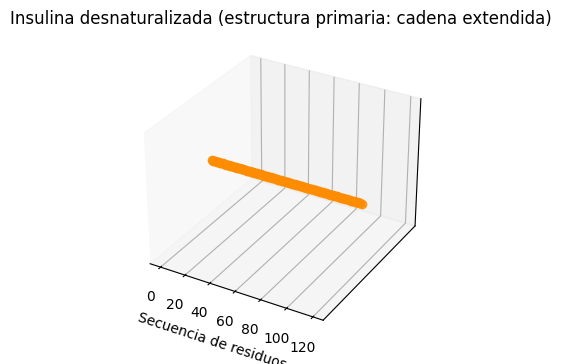

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_cadena_primaria(pdb_path):
    # Extrae el orden de los residuos (sin repetir) según aparecen en el PDB
    residuos = []
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith(('ATOM', 'HETATM')):
                resnum = int(line[22:26])
                chain = line[21]
                if (chain, resnum) not in residuos:
                    residuos.append((chain, resnum))
    # Genera una "cadena extendida" en una línea (por ejemplo, sobre el eje x)
    n = len(residuos)
    x = np.arange(n)
    y = np.zeros(n)
    z = np.zeros(n)
    # Graficar la cadena
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, color='darkorange', linewidth=3, marker='o', alpha=0.8)
    ax.set_title("Insulina desnaturalizada (estructura primaria: cadena extendida)")
    ax.set_xlabel("Secuencia de residuos")
    ax.set_yticks([])
    ax.set_zticks([])
    plt.show()

# Ejemplo de uso:
graficar_cadena_primaria(r"C:\Tareas002\insulina.pdb")

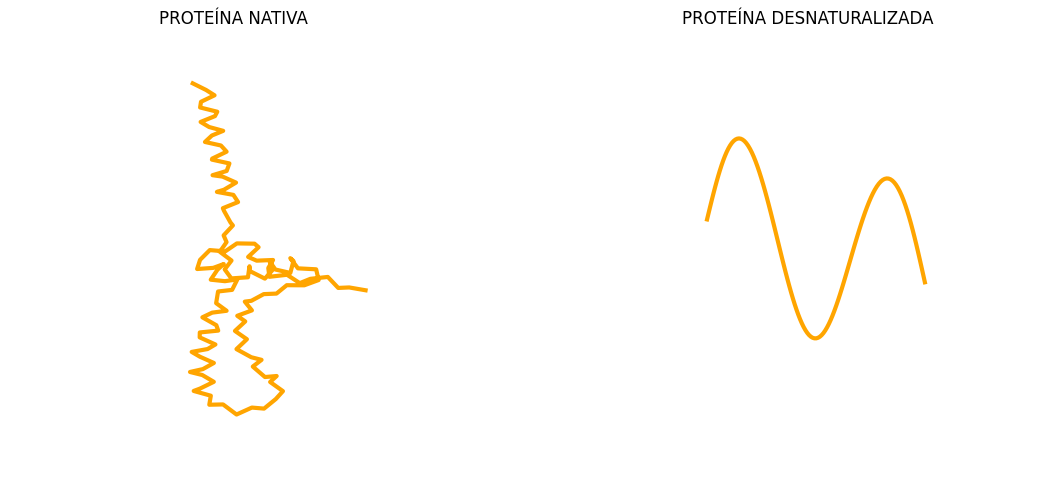

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def extraer_residuos_calpha(pdb_path):
    """
    Devuelve las coordenadas de los carbonos alfa (CA) de cada residuo, por orden.
    """
    ca_coords = []
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and line[12:16].strip() == "CA":
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                ca_coords.append((x, y, z))
    return np.array(ca_coords)

def genera_cadena_extendida(n, salto=4.0):
    """
    Devuelve coordenadas de una cadena extendida (zigzag) para n residuos.
    """
    x = np.arange(0, n*salto, salto)
    y = np.zeros(n)
    z = 2 * np.sin(np.linspace(0, 3*np.pi, n))  # Le da un poco de "onda"
    return np.column_stack((x, y, z))

def graficar_nativa_y_desnaturalizada(pdb_path):
    ca_coords = extraer_residuos_calpha(pdb_path)
    n = ca_coords.shape[0]
    extendida = genera_cadena_extendida(n)

    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Nativa (plegada)
    ax1.plot(ca_coords[:,0], ca_coords[:,1], ca_coords[:,2], color='orange', linewidth=3)
    ax1.set_title("PROTEÍNA NATIVA")
    ax1.axis('off')

    # Desnaturalizada (extendida)
    ax2.plot(extendida[:,0], extendida[:,1], extendida[:,2], color='orange', linewidth=3)
    ax2.set_title("PROTEÍNA DESNATURALIZADA")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Usa tu ruta real
graficar_nativa_y_desnaturalizada(r"C:\Tareas002\insulina.pdb")

In [16]:
import py3Dmol
from urllib.request import urlopen

# Descarga una proteína de ejemplo (1BNA)
pdb_id = "1BNA"
pdb_txt = urlopen(f"https://files.rcsb.org/download/{pdb_id}.pdb").read().decode()

view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_txt, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
import py3Dmol

with open(r"C:\Tareas002\insulina.pdb") as f:
    pdb_txt = f.read()

view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_txt, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
import numpy as np
import py3Dmol

def extraer_calpha_lines(pdb_path):
    ca_lines = []
    with open(pdb_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and line[12:16].strip() == "CA":
                ca_lines.append(line)
    return ca_lines

def reconstruir_pdb_desnaturalizado(ca_lines, calor=1.0):
    """
    Reconstruye un PDB con la proteína desnaturalizada por calor.
    - calor: float >= 0, donde valores más altos significan mayor desorganización
    """
    n = len(ca_lines)
    spacing = 3.8 * (1 + 0.5 * calor)   # Separación aumentada por el calor
    zigzag = 1.5 * (1 + 0.8 * calor)    # Movimiento lateral aumenta con calor

    # Coordenadas extendidas en zigzag
    x = np.arange(n) * spacing
    y = zigzag * np.sin(np.linspace(0, 3*np.pi, n))
    z = zigzag * np.cos(np.linspace(0, 3*np.pi, n))

    pdb_lines = []
    for i, line in enumerate(ca_lines):
        record = line[:6]
        serial = line[6:11]
        name = line[12:16]
        altLoc = line[16]
        resName = line[17:20]
        chainID = line[21]
        resSeq = line[22:26]
        iCode = line[26]
        occupancy = line[54:60]
        tempFactor = line[60:66]
        element = line[76:78]
        charge = line[78:80]

        new_line = (
            f"{record}{serial} {name}{altLoc}{resName} {chainID}{resSeq}{iCode}   "
            f"{x[i]:8.3f}{y[i]:8.3f}{z[i]:8.3f}{occupancy}{tempFactor}          {element}{charge}\n"
        )
        pdb_lines.append(new_line)
    return "".join(pdb_lines)

# ------------------------- USO -------------------------

# Cargar solo los átomos CA
pdb_path = r"C:\Tareas002\insulina.pdb"  # Cambia si es necesario
ca_lines = extraer_calpha_lines(pdb_path)

# Nativo y desnaturalizado con calor
pdb_nativa = "".join(ca_lines)
calor = 2.5  # Puedes cambiar esto (0 = nativa, mayor = más desnaturalización)
pdb_desnat = reconstruir_pdb_desnaturalizado(ca_lines, calor=calor)

# Visualización en py3Dmol
view = py3Dmol.view(width=900, height=450)
view.addModel(pdb_nativa, 'pdb')
view.setStyle({'model': 0}, {'cartoon': {'color': 'spectrum'}})

view.addModel(pdb_desnat, 'pdb')
view.setStyle({'model': 1}, {'line': {'color': 'orange', 'linewidth': 4}})

view.setViewStyle({'sideBySide': True})
view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from pdbfixer import PDBFixer
from sys import stdout

# === PARTE 1: Cargar el archivo PDB de insulina ===
input_pdb_path = "insulina.pdb"  # Asegúrate de tener este archivo en el mismo directorio
fixer = PDBFixer(filename=input_pdb_path)

# Arreglar posibles errores y agregar agua
fixer.findMissingResidues()
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(pH=7.0)

# === PARTE 2: Crear el sistema en OpenMM ===
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
modeller = Modeller(fixer.topology, fixer.positions)
modeller.addSolvent(forcefield, model='tip3p', padding=1.0*nanometer)

system = forcefield.createSystem(modeller.topology,
                                 nonbondedMethod=PME,
                                 nonbondedCutoff=1.0*nanometer,
                                 constraints=HBonds)

# === PARTE 3: Configurar la simulación con alta temperatura ===
integrator = LangevinIntegrator(1000*kelvin, 1/picosecond, 0.002*picoseconds)  # 500 K para desnaturalizar
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)

# Minimizar energía
print("Minimizando energía...")
simulation.minimizeEnergy()

# Equilibrar durante un corto tiempo
print("Equilibrando...")
simulation.context.setVelocitiesToTemperature(1000*kelvin)
simulation.step(1000)

# Simular (por ejemplo 50 ps)
n_steps = 25000  # 50 ps con paso de 2 fs
print("Simulando desnaturalización...")
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True, progress=True, remainingTime=True, speed=True, totalSteps=n_steps, separator='\t'))
simulation.step(n_steps)

# === PARTE 4: Guardar el estado final ===
positions = simulation.context.getState(getPositions=True).getPositions()
with open("insulin_desnaturalizada_2.pdb", "w") as output:
    PDBFile.writeFile(simulation.topology, positions, output)

print("\n✅ Desnaturalización completada. Archivo guardado como 'insulin_desnaturalizada_2.pdb'.")

Minimizando energía...


OpenMMException: clWaitForEvents